In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('Tokokita.xlsx', sheet_name='Toko')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal      400 non-null    datetime64[ns]
 1   Kode Barang  400 non-null    float64       
 2   Nama Barang  400 non-null    object        
 3   Kategori     400 non-null    object        
 4   Sat          400 non-null    object        
 5   Qty          400 non-null    float64       
 6   Jual(Rp)     399 non-null    float64       
 7   Beli(Rp)     399 non-null    float64       
 8   Penjualan    400 non-null    float64       
 9   Pembelian    400 non-null    float64       
 10  Region       801 non-null    object        
 11  City         801 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 75.2+ KB
None
                   Tanggal   Kode Barang         Qty       Jual(Rp)  \
count                  400  4.000000e+02  400.000000     399.

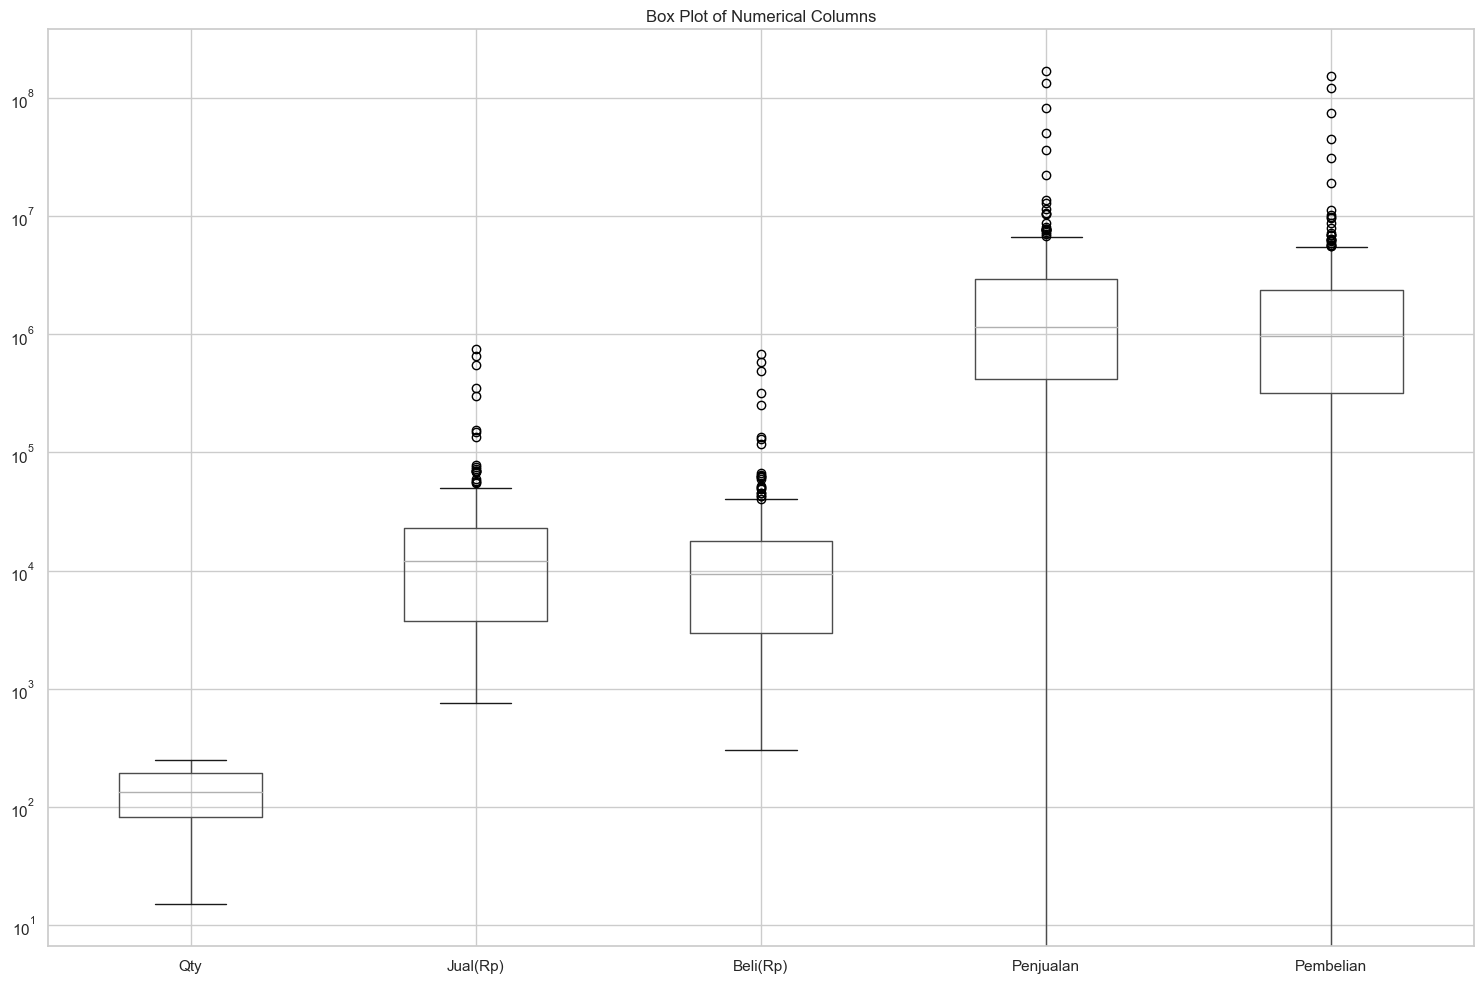

Sample rows with potential issues:
      Tanggal  Kode Barang           Nama Barang Kategori  Sat   Qty  \
98 2020-06-10     600104.0  BATERAI ALKALINE AAA  BATERAI  pak  87.0   

    Jual(Rp)  Beli(Rp)  Penjualan  Pembelian   Region          City  
98       NaN       NaN        0.0        0.0  Jakarta  East Jakarta  
      Tanggal  Kode Barang           Nama Barang Kategori  Sat   Qty  \
98 2020-06-10     600104.0  BATERAI ALKALINE AAA  BATERAI  pak  87.0   

    Jual(Rp)  Beli(Rp)  Penjualan  Pembelian   Region          City  
98       NaN       NaN        0.0        0.0  Jakarta  East Jakarta  
Empty DataFrame
Columns: [Tanggal, Kode Barang, Nama Barang, Kategori, Sat, Qty, Jual(Rp), Beli(Rp), Penjualan, Pembelian, Region, City]
Index: []


In [12]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\
Duplicate rows:", df.duplicated().sum())

# Display the range of dates
print("\
Date range:")
print(df['Tanggal'].min(), "to", df['Tanggal'].max())

# Plot a box plot for numerical columns to identify outliers
numerical_columns = ['Qty', 'Jual(Rp)', 'Beli(Rp)', 'Penjualan', 'Pembelian']
plt.figure(figsize=(15, 10))
df[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.yscale('log')  # Using log scale for better visualization
plt.tight_layout()
plt.show()

# Print some rows with potential issues
print("\
Sample rows with potential issues:")
print(df[df['Penjualan'] <= 0].head())
print(df[df['Pembelian'] <= 0].head())
print(df[df['Qty'] <= 0].head())

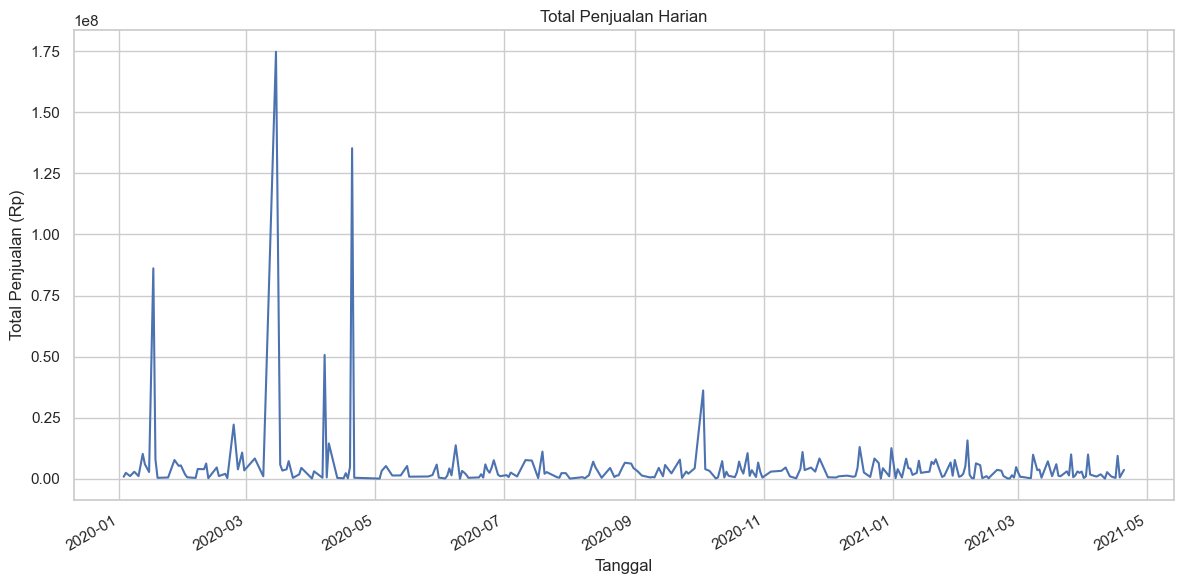

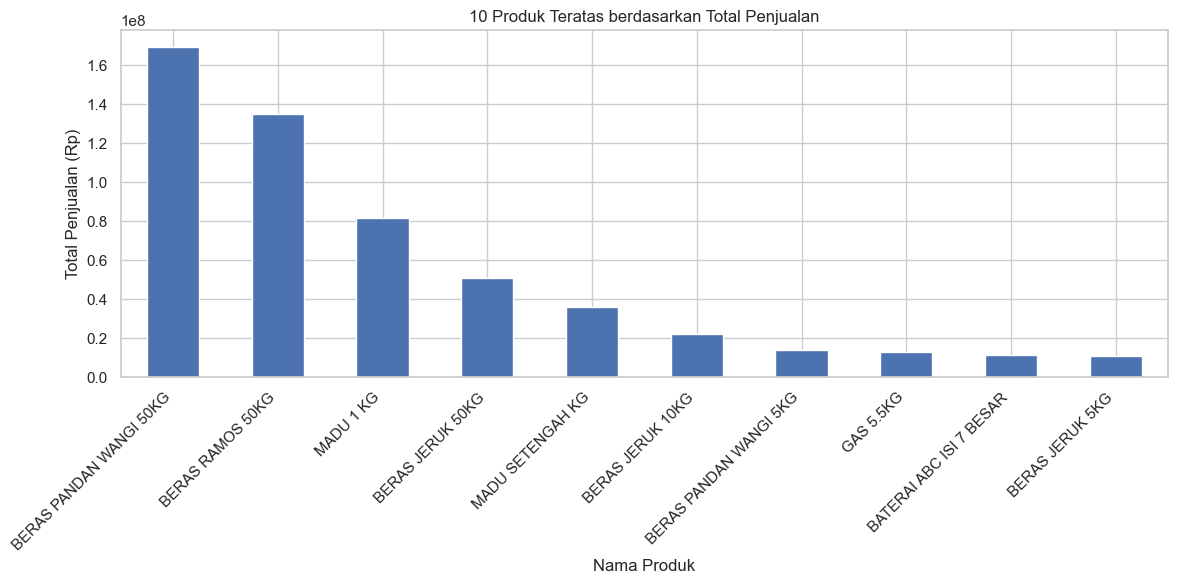

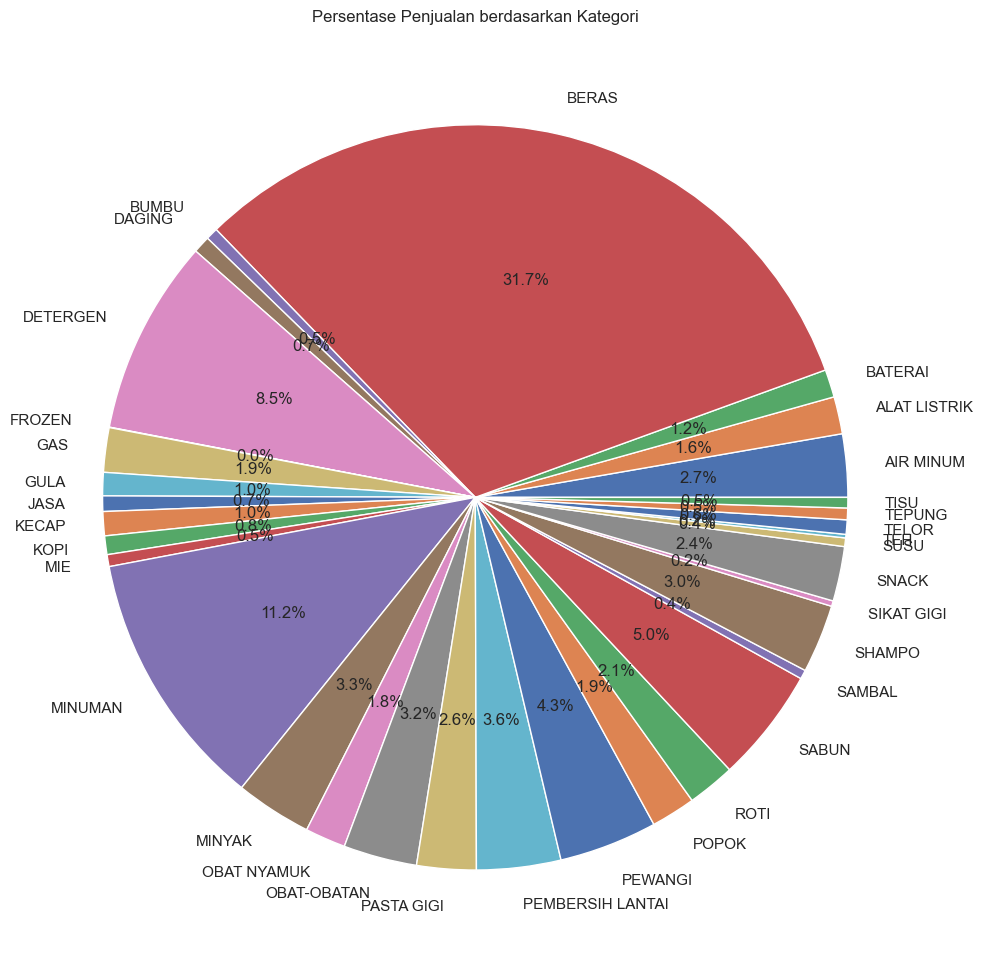

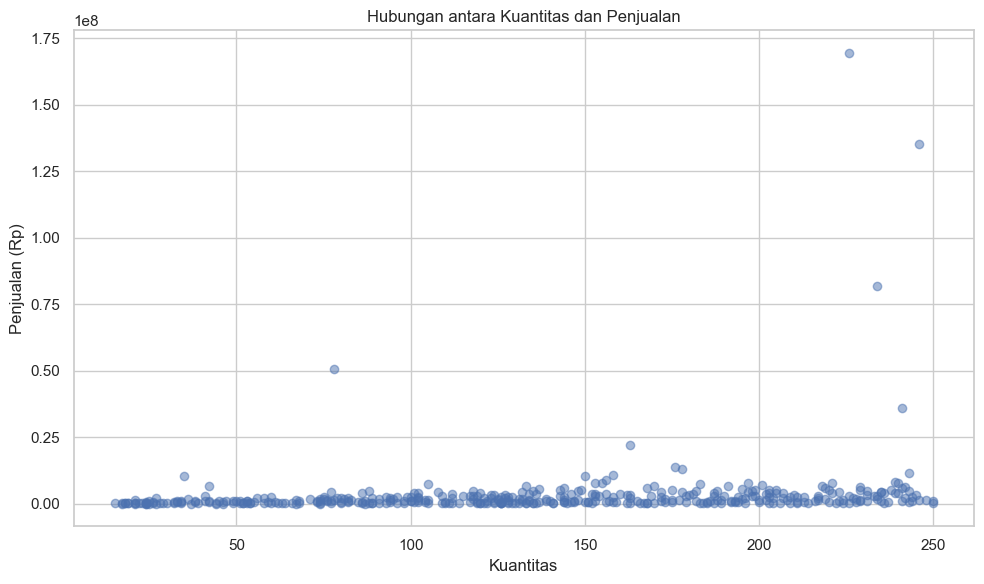

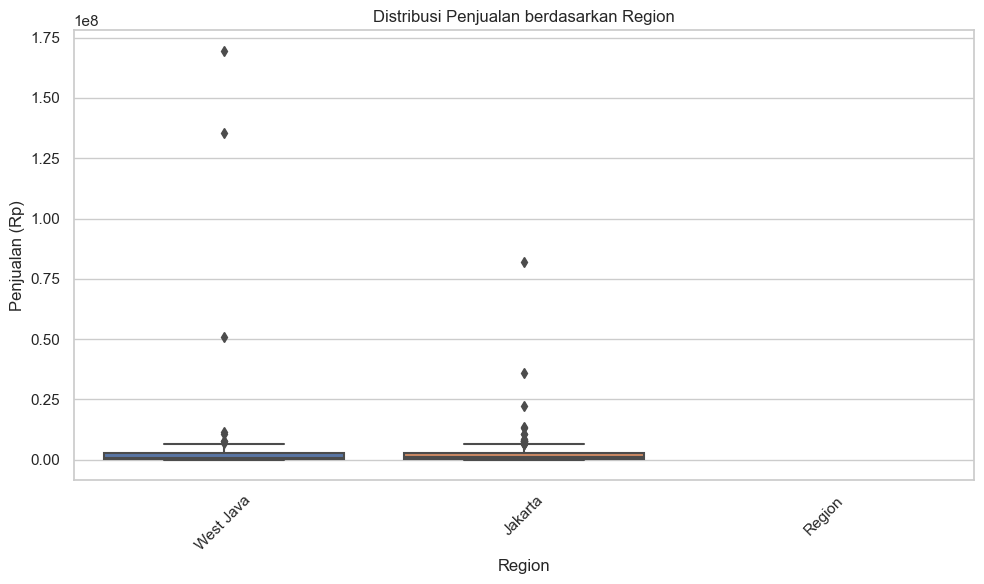

Visualisasi telah dibuat.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data
df = pd.read_excel('Tokokita.xlsx', sheet_name='Toko')

# Convert 'Tanggal' to datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce')

# 1. Time Series Plot of Daily Sales
plt.figure(figsize=(12, 6))
df.groupby('Tanggal')['Penjualan'].sum().plot()
plt.title('Total Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Rp)')
plt.tight_layout()
plt.show()

# 2. Bar Plot of Top 10 Products by Sales
top_products = df.groupby('Nama Barang')['Penjualan'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('10 Produk Teratas berdasarkan Total Penjualan')
plt.xlabel('Nama Produk')
plt.ylabel('Total Penjualan (Rp)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Pie Chart of Sales by Category
category_sales = df.groupby('Kategori')['Penjualan'].sum()
plt.figure(figsize=(10, 10))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
plt.title('Persentase Penjualan berdasarkan Kategori')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 4. Scatter Plot of Quantity vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Qty'], df['Penjualan'], alpha=0.5)
plt.title('Hubungan antara Kuantitas dan Penjualan')
plt.xlabel('Kuantitas')
plt.ylabel('Penjualan (Rp)')
plt.tight_layout()
plt.show()

# 5. Box Plot of Sales by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Penjualan', data=df)
plt.title('Distribusi Penjualan berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Penjualan (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Visualisasi telah dibuat.")
